importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [ ]:
import pandas as pd
data_path = "/content/abalone.data"

# Define column names based on the abalone.names or dataset description
column_names = [
    'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
    'Viscera_weight', 'Shell_weight', 'Rings'
]

# Load the .data file (assuming it is comma-separated)
data = pd.read_csv(data_path, names=column_names, delimiter=",")
print(data.head())


  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [ ]:
# Display basic information and statistics
print(data.info())
print(data.describe())
print(data['Rings'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None
            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000

In [ ]:
data.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0
Rings,0


In [ ]:
for column in ['Length', 'Diameter', 'Height', 'Whole_weight',
               'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']:
    data[column].fillna(data[column].mean(), inplace=True)
    data['Sex'].fillna(data['Sex'].mode()[0], inplace=True)


<ipython-input-6-6ef77ab1e478>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-6-6ef77ab1e478>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Encode the column(categorical to numerical value)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Sex']=label_encoder.fit_transform(data['Sex'])

In [ ]:
# Define target variable and features
X = data.drop(columns=['Rings'])
y = data['Rings']

#  EDA

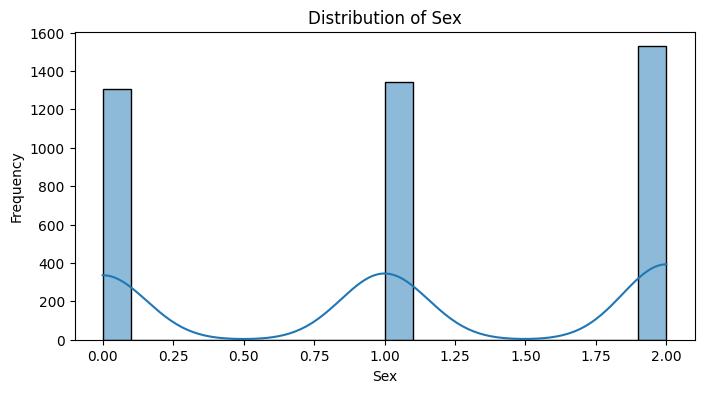

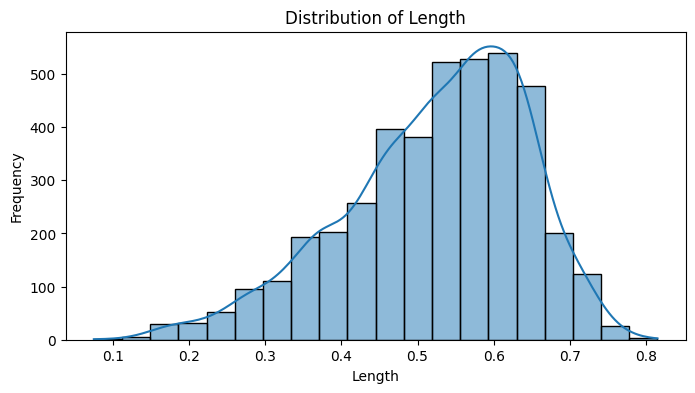

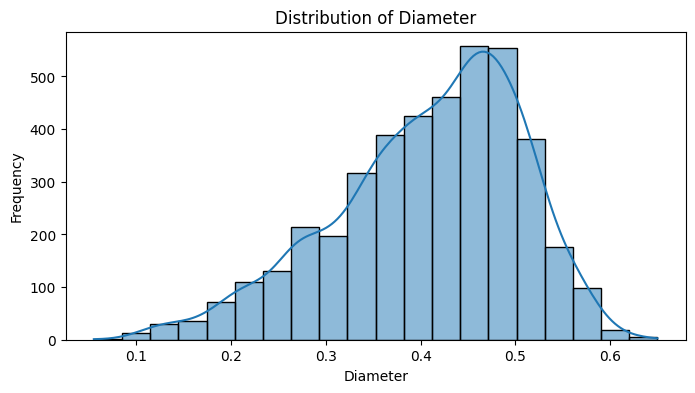

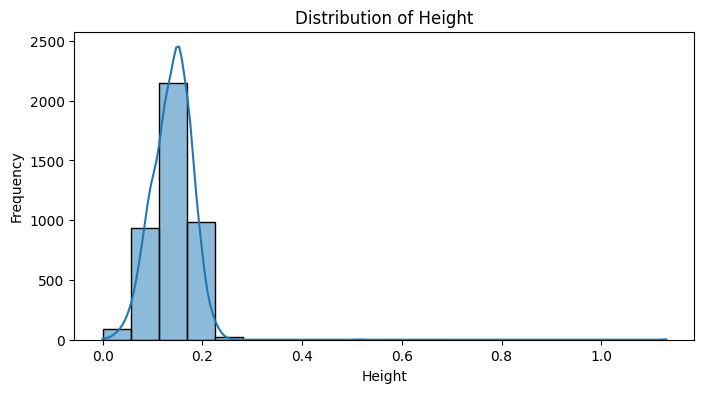

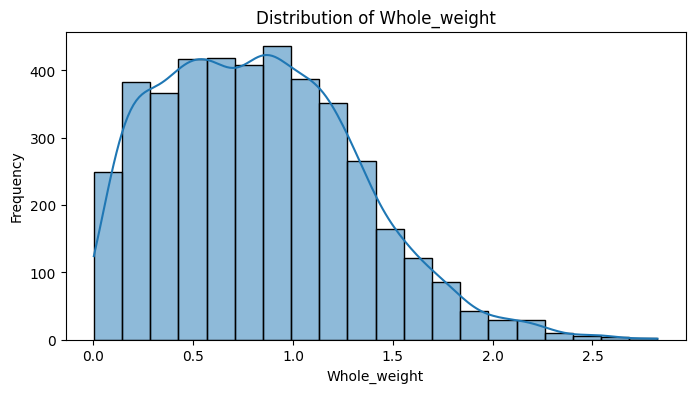

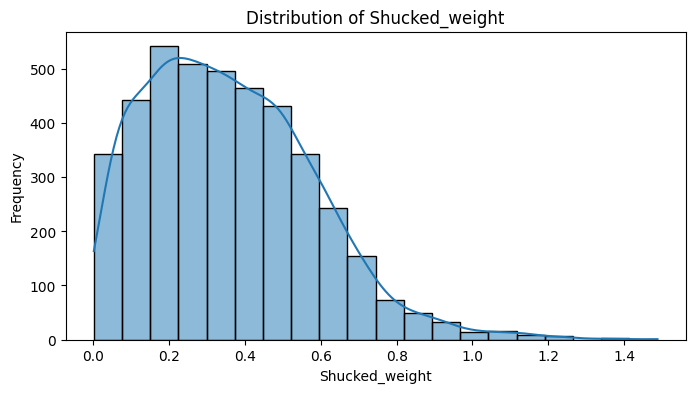

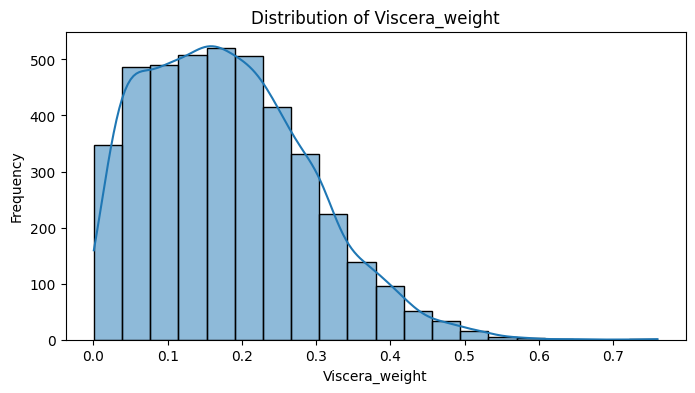

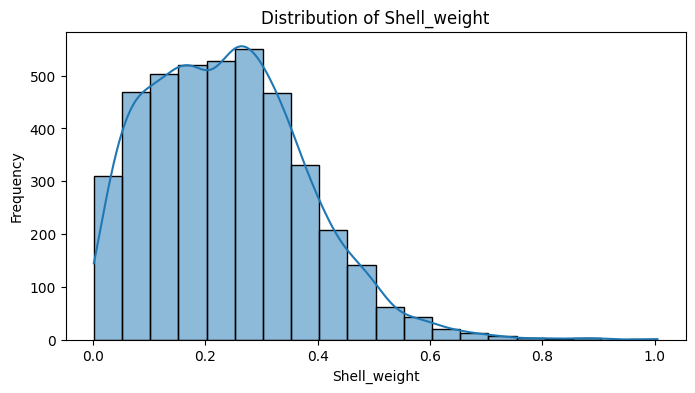

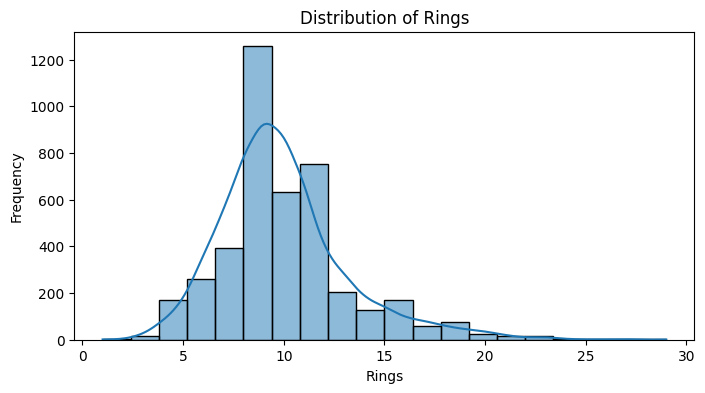

In [ ]:
for col in column_names:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Text(0.5, 0, 'Features')

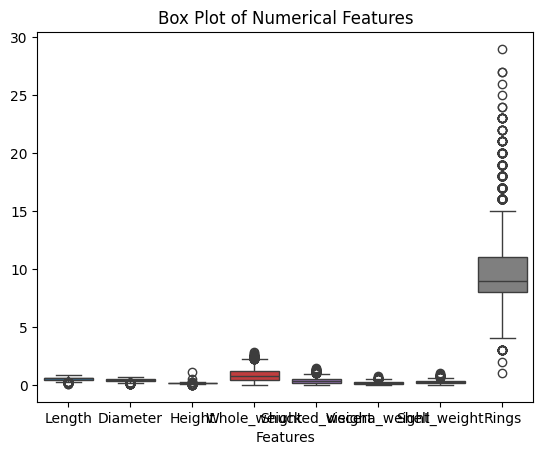

In [ ]:
sns.boxplot(data=data.drop(columns=['Sex']))
plt.title("Box Plot of Numerical Features")
plt.xlabel("Features")

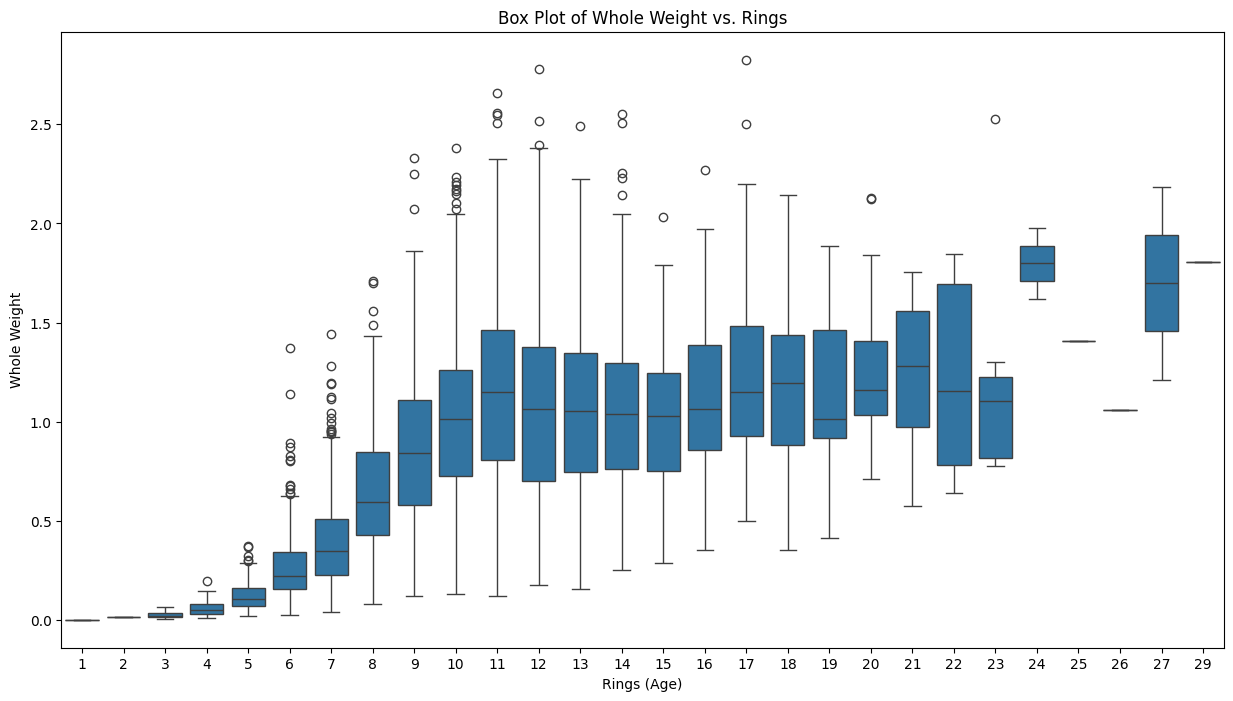

In [ ]:
#Feature vs. Target variable
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, x='Rings', y='Whole_weight')
plt.title("Box Plot of Whole Weight vs. Rings")
plt.xlabel("Rings (Age)")
plt.ylabel("Whole Weight")
plt.show()

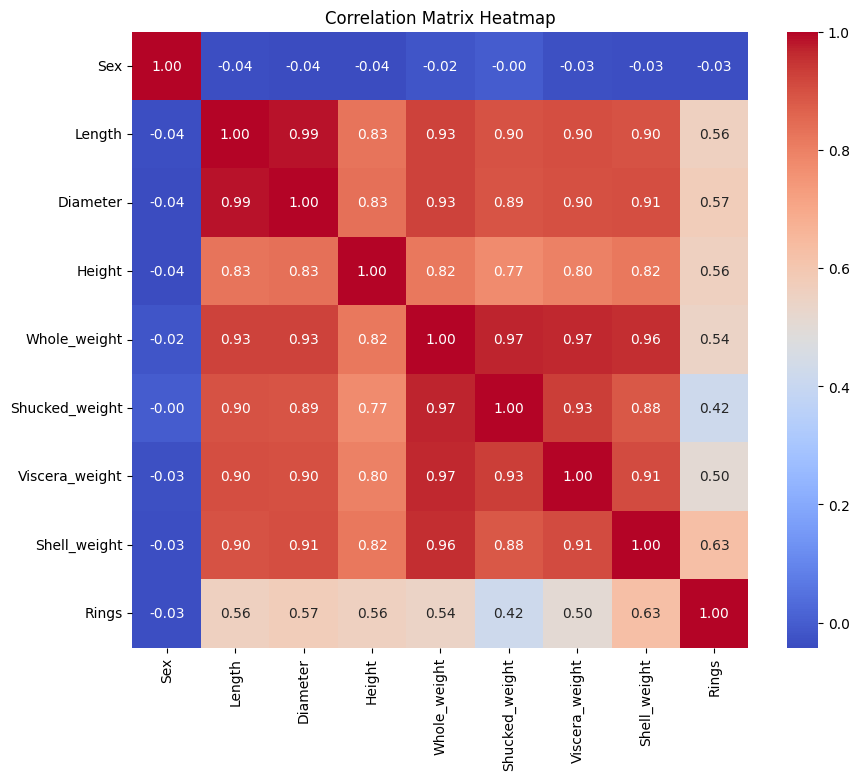

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

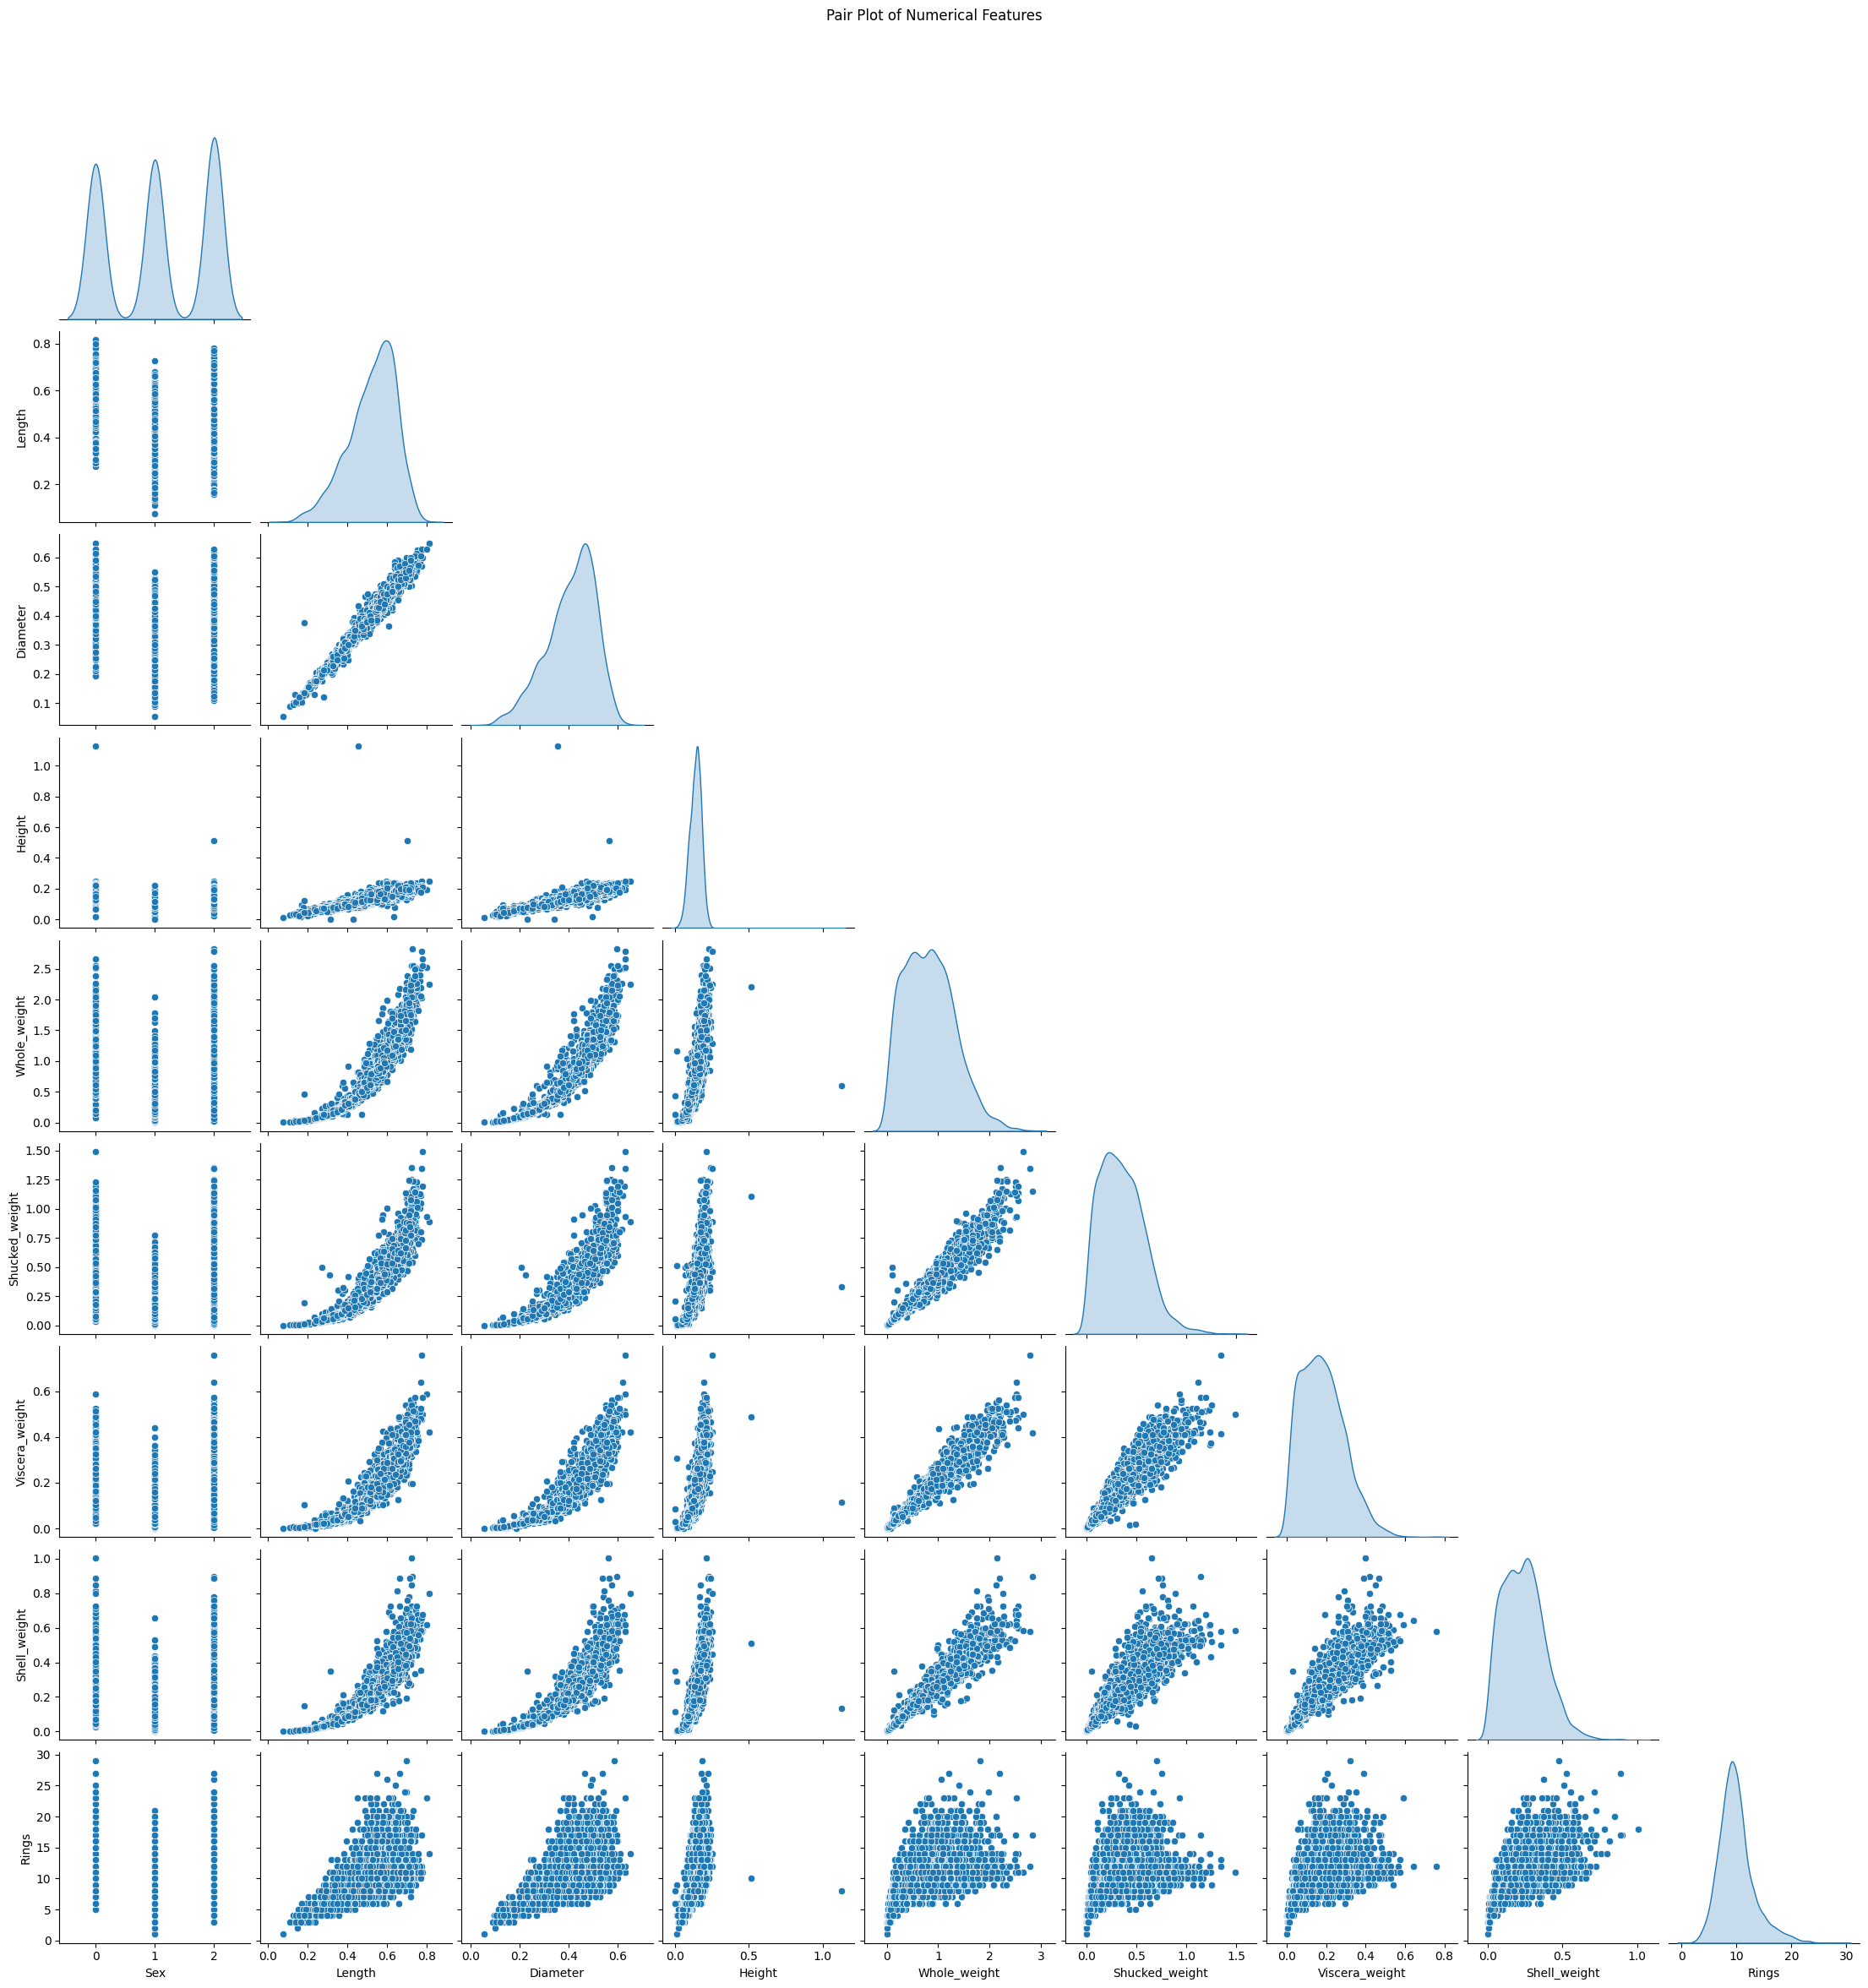

In [ ]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
sns.pairplot(data[numerical_columns], corner=True, diag_kind="kde")
plt.suptitle("Pair Plot of Numerical Features", y=1.05)
plt.show()

In [ ]:

from sklearn.preprocessing import StandardScaler

column_name = data.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
data[column_name] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows to verify
print(data.head())


        Sex    Length  Diameter    Height  Whole_weight  Shucked_weight  \
0  1.151980 -0.574558 -0.432149 -1.064424     -0.641898       -0.607685   
1  1.151980 -1.448986 -1.439929 -1.183978     -1.230277       -1.170910   
2 -1.280690  0.050033  0.122130 -0.107991     -0.309469       -0.463500   
3  1.151980 -0.699476 -0.432149 -0.347099     -0.637819       -0.648238   
4 -0.064355 -1.615544 -1.540707 -1.423087     -1.272086       -1.215968   

   Viscera_weight  Shell_weight     Rings  
0       -0.726212     -0.638217  1.571544  
1       -1.205221     -1.212987 -0.910013  
2       -0.356690     -0.207139 -0.289624  
3       -0.607600     -0.602294  0.020571  
4       -1.287337     -1.320757 -0.910013  


### Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[column_name] = scaler.fit_transform(data[numerical_columns])

print(data.head())


   Sex    Length  Diameter    Height  Whole_weight  Shucked_weight  \
0  1.0  0.513514  0.521008  0.084071      0.181335        0.150303   
1  1.0  0.371622  0.352941  0.079646      0.079157        0.066241   
2  0.0  0.614865  0.613445  0.119469      0.239065        0.171822   
3  1.0  0.493243  0.521008  0.110619      0.182044        0.144250   
4  0.5  0.344595  0.336134  0.070796      0.071897        0.059516   

   Viscera_weight  Shell_weight     Rings  
0        0.132324      0.147982  0.500000  
1        0.063199      0.068261  0.214286  
2        0.185648      0.207773  0.285714  
3        0.149440      0.152965  0.321429  
4        0.051350      0.053313  0.214286  


### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Rings'])
y = data['Rings']

#stratify split to maintain calss distrubtion
X_train, X_temp, y_train, y_temp = train_test_split(X, y_binned, test_size=0.3, stratify=y_binned, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Print the shapes of the datasets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (2923, 8)
Validation set shape: (627, 8)
Test set shape: (627, 8)


part 2)  Implement a multi-layer perceptron from scratch

In [ ]:
#using sigmoid as an activation function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = "/content/abalone.data"
column_names = [
    'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
    'Viscera_weight', 'Shell_weight', 'Rings'
]

data = pd.read_csv(data_path, names=column_names, delimiter=",")

data['Sex'] = data['Sex'].map({'M': 1, 'F': 2, 'I': 3})

features = data.drop('Rings', axis=1)  # Features numerical nomralization
target = data['Rings']

features = (features - features.mean()) / features.std()

# one hot-endcoding
target = pd.get_dummies(target).values
#convert features and target to numpy array
X = features.values
y = target

In [ ]:
class Multi_layer_perceptron:
  def __init__(self,input_s,hidden_s,output_s):
    self.input_s=input_s #no. of neuron that are present in inp,outand hidden
    self.ouput_s=output_s
    self.hidden_s=hidden_s

    #Intialize weights and biases
    self.weights_input_hidden=np.random.randn(self.input_s,self.hidden_s)
    self.bias_input_hidden=np.random.randn(1,self.hidden_s)
    self.weights_hidden_output=np.random.randn(self.hidden_s,self.ouput_s)
    self.bias_hidden_output=np.random.randn(1,self.ouput_s)

  def sigmoid(self,x):
    return 1/(1+np.exp(-x))

  def sigmoid_der(self,x):  #taking derivative
    return x*(1-x)

  def train(self,X_train,y_train,epochs,lr):
    self.losses=[ ] #store loss at each run
    for epoch in range(epochs):
      #forward pass
      hidden_output=self.sigmoid(np.dot(X_train,self.weights_input_hidden)+self.bias_input_hidden)
      output=self.sigmoid(np.dot(hidden_output,self.weights_hidden_output)+self.bias_hidden_output)

      #backpropagation
      error=y_train - output
      d_output=error*self.sigmoid_der(output)  #hidden to ouput

      error_hidden=d_output.dot(self.weights_hidden_output.T) #input to hidden
      d_hidden=error_hidden*self.sigmoid_der(hidden_output)

      #update weights and biases
      self.weights_hidden_output+=hidden_output.T.dot(d_output)*lr
      self.bias_hidden_output+=np.sum(d_output,axis=0,keepdims=True)*lr
      self.weights_input_hidden+=X_train.T.dot(d_hidden)*lr
      self.bias_input_hidden+=np.sum(d_hidden,axis=0,keepdims=True)*lr

      #calculate loss and append to list
      loss=np.mean(np.square(error))
      self.losses.append(loss)

      #print loss every 100 epochs
      if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

  def predict(self,X_test):
    hidden_output=self.sigmoid(np.dot(X_test,self.weights_input_hidden)+self.bias_input_hidden)
    output=self.sigmoid(np.dot(hidden_output,self.weights_hidden_output)+self.bias_hidden_output)
    return output

  def compute_accuracy(self,X_test,y_test):
    predictions=self.predict(X_test)
    predicted_classes=np.argmax(predictions,axis=1)
    true_classes=np.argmax(y_test,axis=1)
    accuracy=np.mean(predicted_classes==true_classes)
    return accuracy


   # Step 4: Train the MLP
if __name__ == "__main__":
    # Initialize MLP
    input_s = X.shape[1]  # Number of input features
    hidden_s= 10
    output_s =y.shape[1] # Number of classes

    mlp = Multi_layer_perceptron(input_s, hidden_s, output_s)

    # Train the network
    epochs =500
    lr = 0.005
    mlp.train(X, y, epochs, lr)

    # Predict and evaluate accuracy
    accuracy = mlp.compute_accuracy(X, y)
    print("Accuracy of the MLP on the training data:", accuracy)






Epoch 0, Loss: 0.2886652827587385
Epoch 100, Loss: 0.03026406636848602
Epoch 200, Loss: 0.029800999041676955
Epoch 300, Loss: 0.029613586035073653
Epoch 400, Loss: 0.029466522391664824
Accuracy of the MLP on the training data: 0.27842949485276514


part 3) USING ALL THE 3 ACTIVATION FUNCTION

1)SIGMOID

2)Relu

3)Tanh

In [ ]:
import pandas as pd
import numpy as np

# Load and preprocess the data
data_path = "/content/abalone.data"
column_names = [
    'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
    'Viscera_weight', 'Shell_weight', 'Rings'
]

data = pd.read_csv(data_path, names=column_names, delimiter=",")
data['Sex'] = data['Sex'].map({'M': 1, 'F': 2, 'I': 3})

# Normalize features and one-hot encode target
features = data.drop('Rings', axis=1)
features = (features - features.mean()) / features.std()
target = pd.get_dummies(data['Rings']).values

X = features.values
y = target

class MultiLayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size, activation_function="sigmoid"):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation_function = activation_function

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * 0.1
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * 0.1
        self.bias_hidden_output = np.zeros((1, self.output_size))

    def activate(self, x):
        if self.activation_function == "sigmoid":
            return 1 / (1 + np.exp(-x))
        elif self.activation_function == "relu":
            return np.maximum(0, x)
        elif self.activation_function == "tanh":
            return np.tanh(x)

    def activate_derivative(self, x):
        if self.activation_function == "sigmoid":
            return x * (1 - x)
        elif self.activation_function == "relu":
            return np.where(x > 0, 1, 0)
        elif self.activation_function == "tanh":
            return 1 - np.square(x)

    def forward_propagate(self, X):
        # Input to hidden layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_output = self.activate(self.hidden_input)

        # Hidden layer to output
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        self.final_output = self.activate(self.final_input)
        return self.final_output

    def backpropagate(self, X, y, output, lr):
        error = y - output
        d_output = error * self.activate_derivative(output)  # Gradient for output layer

        # Calculate error for hidden layer
        error_hidden = d_output.dot(self.weights_hidden_output.T)
        d_hidden = error_hidden * self.activate_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * lr
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * lr
        self.weights_input_hidden += X.T.dot(d_hidden) * lr
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * lr

        return np.mean(np.square(error))  # Return loss for tracking

    def train(self, X_train, y_train, epochs, lr):
        self.losses = []
        for epoch in range(epochs):
            for i in range(X_train.shape[0]):  # SGD: Update on each sample
                X_sample = X_train[i:i+1]
                y_sample = y_train[i:i+1]

                # Forward and backward propagation
                output = self.forward_propagate(X_sample)
                loss = self.backpropagate(X_sample, y_sample, output, lr)

            self.losses.append(loss)  # Track loss for each epoch
            if epoch % 25 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X_test):
        output = self.forward_propagate(X_test)
        return np.argmax(output, axis=1)

    def compute_accuracy(self, X_test, y_test):
        predictions = self.predict(X_test)
        true_classes = np.argmax(y_test, axis=1)
        accuracy = np.mean(predictions == true_classes)
        return accuracy

# Train and evaluate with different activation functions
activation_functions = ["sigmoid", "relu", "tanh"]

for activation in activation_functions:
    print(f"\nTraining with {activation} activation function:")
    mlp = MultiLayerPerceptron(input_size=X.shape[1], hidden_size=32, output_size=y.shape[1], activation_function=activation)

    # Train the network
    epochs = 100
    lr = 0.001
    mlp.train(X, y, epochs, lr)

    # Compute accuracy on training data
    accuracy = mlp.compute_accuracy(X, y)
    print(f"Accuracy of the MLP with {activation} activation on the training data: {accuracy}")



Training with sigmoid activation function:
Epoch 0, Loss: 0.04931111900324198
Epoch 25, Loss: 0.03570217628460678
Epoch 50, Loss: 0.036437864497785015
Epoch 75, Loss: 0.036145108823953935
Accuracy of the MLP with sigmoid activation on the training data: 0.2449126167105578

Training with relu activation function:
Epoch 0, Loss: 0.03938051487601018
Epoch 25, Loss: 0.038548557406499935
Epoch 50, Loss: 0.0377530134909292
Epoch 75, Loss: 0.03817955183405612
Accuracy of the MLP with relu activation on the training data: 0.2856116830260953

Training with tanh activation function:
Epoch 0, Loss: 0.041702962376285076
Epoch 25, Loss: 0.03841095609389356
Epoch 50, Loss: 0.037293171987354434
Epoch 75, Loss: 0.03661673731885318
Accuracy of the MLP with tanh activation on the training data: 0.27220493176921234


In [ ]:
import numpy as np
import pandas as pd

# Load and preprocess the data
data_path = "/content/abalone.data"
column_names = [
    'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
    'Viscera_weight', 'Shell_weight', 'Rings'
]

data = pd.read_csv(data_path, names=column_names, delimiter=",")
data['Sex'] = data['Sex'].map({'M': 1, 'F': 2, 'I': 3})

# Normalize features and one-hot encode target
features = data.drop('Rings', axis=1)
features = (features - features.mean()) / features.std()
target = pd.get_dummies(data['Rings']).values

X = features.values
y = target

class MultiLayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size, activation="sigmoid"):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation = activation

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * 0.1
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * 0.1
        self.bias_hidden_output = np.zeros((1, self.output_size))

    # Activation functions
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.square(x)

    # Activation function selector
    def activate(self, x):
        if self.activation == "sigmoid":
            return self.sigmoid(x)
        elif self.activation == "relu":
            return self.relu(x)
        elif self.activation == "tanh":
            return self.tanh(x)

    def activate_derivative(self, x):
        if self.activation == "sigmoid":
            return self.sigmoid_derivative(x)
        elif self.activation == "relu":
            return self.relu_derivative(x)
        elif self.activation == "tanh":
            return self.tanh_derivative(x)

    # Forward propagation
    def forward_propagate(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_output = self.activate(self.hidden_input)

        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        self.final_output = self.sigmoid(self.final_input)  # Output layer uses sigmoid
        return self.final_output

    # Backpropagation
    def backpropagate(self, X, y, output, lr):
        error = y - output
        d_output = error * self.sigmoid_derivative(output)  # Output layer gradient

        # Error and gradient for hidden layer
        error_hidden = d_output.dot(self.weights_hidden_output.T)
        d_hidden = error_hidden * self.activate_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * lr
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * lr
        self.weights_input_hidden += X.T.dot(d_hidden) * lr
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * lr

        return np.mean(np.square(error))  # Loss calculation

    # Train the network using stochastic gradient descent
    def train(self, X_train, y_train, epochs, lr):
        self.losses = []
        for epoch in range(epochs):
            total_loss = 0
            for i in range(X_train.shape[0]):  # SGD: Update on each sample
                X_sample = X_train[i:i+1]
                y_sample = y_train[i:i+1]

                # Forward and backward propagation
                output = self.forward_propagate(X_sample)
                loss = self.backpropagate(X_sample, y_sample, output, lr)
                total_loss += loss

            average_loss = total_loss / X_train.shape[0]
            self.losses.append(average_loss)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {average_loss}")

    # Predict and calculate accuracy
    def predict(self, X_test):
        output = self.forward_propagate(X_test)
        return np.argmax(output, axis=1)

    def compute_accuracy(self, X_test, y_test):
        predictions = self.predict(X_test)
        true_classes = np.argmax(y_test, axis=1)
        accuracy = np.mean(predictions == true_classes)
        return accuracy

# Store losses and accuracies for each activation function
results = {}

activation_functions = ["sigmoid", "relu", "tanh"]

for activation in activation_functions:
    print(f"\nTraining with {activation} activation function:")
    mlp = MultiLayerPerceptron(input_size=X.shape[1], hidden_size=32, output_size=y.shape[1], activation=activation)

    # Train the network
    epochs = 100
    lr = 0.01
    mlp.train(X, y, epochs, lr)

    # Compute accuracy on training data
    accuracy = mlp.compute_accuracy(X, y)
    print(f"Accuracy of the MLP with {activation} activation on the training data: {accuracy}")

    # Store results
    results[activation] = {
        "losses": mlp.losses,
        "accuracy": accuracy
    }



Training with sigmoid activation function:
Epoch 0, Loss: 0.04036525999743342
Epoch 10, Loss: 0.03079890960194848
Epoch 20, Loss: 0.030478280403813316
Epoch 30, Loss: 0.0301892171297591
Epoch 40, Loss: 0.029951799178831798
Epoch 50, Loss: 0.0297932869708011
Epoch 60, Loss: 0.029685015601029093
Epoch 70, Loss: 0.02960291543156739
Epoch 80, Loss: 0.029536352529833908
Epoch 90, Loss: 0.029480631638927012
Accuracy of the MLP with sigmoid activation on the training data: 0.26909265022743595

Training with relu activation function:
Epoch 0, Loss: 0.04730475909318835
Epoch 10, Loss: 0.029791999781172033
Epoch 20, Loss: 0.0294176696754651
Epoch 30, Loss: 0.029264827637631188
Epoch 40, Loss: 0.029124149934667533
Epoch 50, Loss: 0.02895460259436483
Epoch 60, Loss: 0.028860842426291992
Epoch 70, Loss: 0.02879030874921656
Epoch 80, Loss: 0.028724599072704034
Epoch 90, Loss: 0.028675199943828923
Accuracy of the MLP with relu activation on the training data: 0.2793871199425425

Training with tanh a

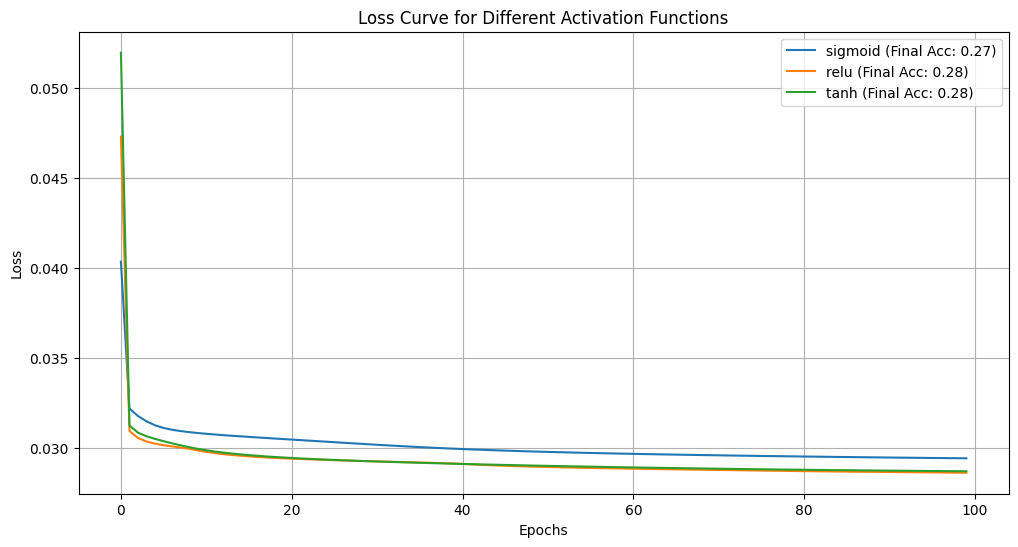

In [ ]:
import matplotlib.pyplot as plt

# Plotting loss curves for each activation function
plt.figure(figsize=(12, 6))

for activation in results:
    plt.plot(results[activation]["losses"], label=f"{activation} (Final Acc: {results[activation]['accuracy']:.2f})")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve for Different Activation Functions")
plt.legend()
plt.grid(True)
plt.show()


Part 4) Experiment with different weight initialization: Random, Zero & Constant.


Training with random initialization:
Epoch 0, Loss: 0.08699615118101235
Epoch 5, Loss: 0.033446988826660425
Epoch 10, Loss: 0.032500225493573065
Epoch 15, Loss: 0.03216216310875934
Epoch 20, Loss: 0.03195515095913927
Accuracy of the MLP with random initialization on the training data: 0.2013406751256883

Training with zero initialization:
Epoch 0, Loss: 0.09009380684161604
Epoch 5, Loss: 0.03352509219185678
Epoch 10, Loss: 0.03264524498719145
Epoch 15, Loss: 0.032384365721807244
Epoch 20, Loss: 0.03226349835100906
Accuracy of the MLP with zero initialization on the training data: 0.1649509217141489

Training with constant initialization:
Epoch 0, Loss: 0.231337440987515
Epoch 5, Loss: 0.03424167357371421
Epoch 10, Loss: 0.032818019409649284
Epoch 15, Loss: 0.032467468747614595
Epoch 20, Loss: 0.03231747949701939
Accuracy of the MLP with constant initialization on the training data: 0.1649509217141489


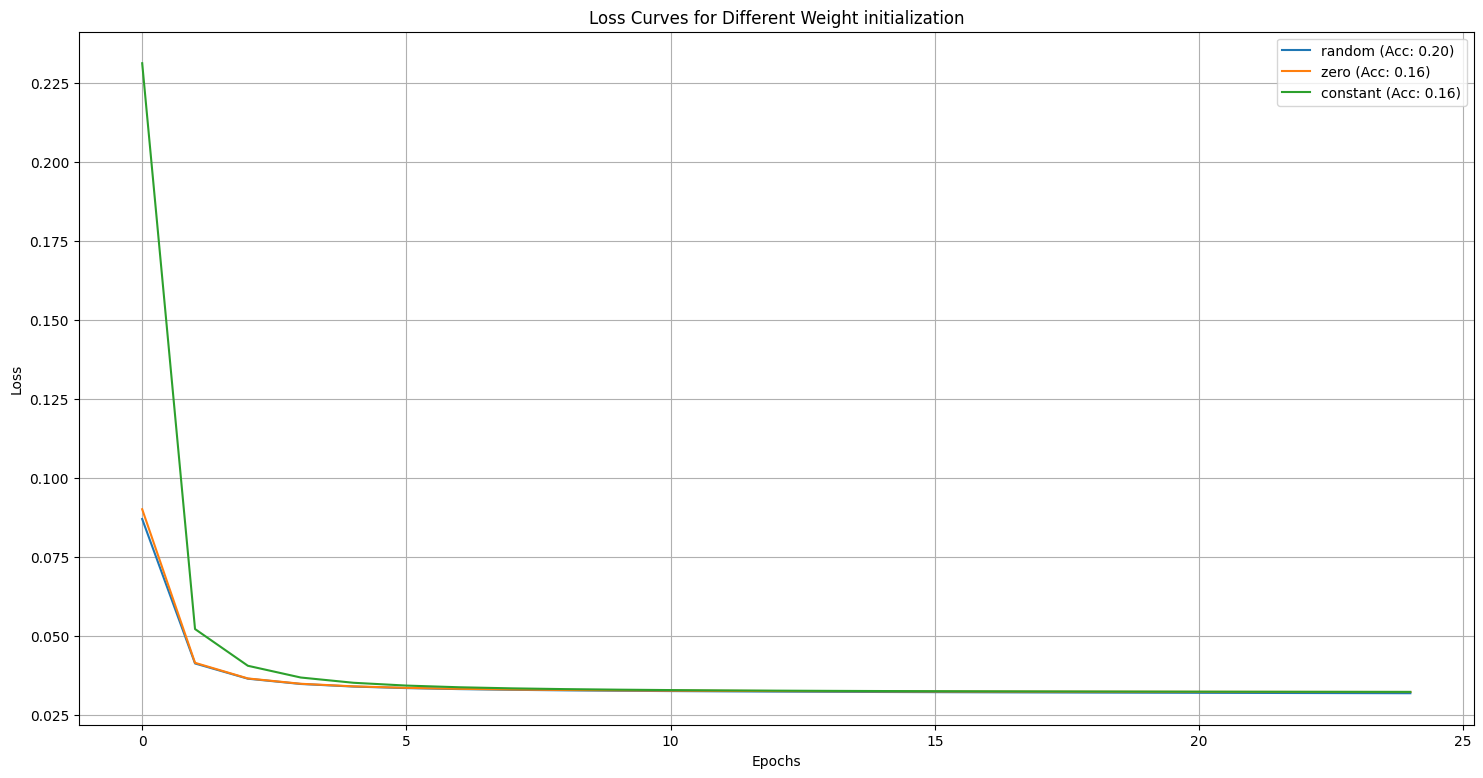

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Load and preprocess the data
data_path = "/content/abalone.data"
column_names = [
    'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
    'Viscera_weight', 'Shell_weight', 'Rings'
]

data = pd.read_csv(data_path, names=column_names, delimiter=",")
data['Sex'] = data['Sex'].map({'M': 1, 'F': 2, 'I': 3})

# Normalize features and one-hot encode target
features = data.drop('Rings', axis=1)
features = (features - features.mean()) / features.std()
target = pd.get_dummies(data['Rings']).values

X = features.values
y = target

class MultiLayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size, initialization="random"):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.initialize_weights(initialization)

    def initialize_weights(self, method):
        if method == "random":
            self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * 0.1
            self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * 0.1
        elif method == "zero":
            self.weights_input_hidden = np.zeros((self.input_size, self.hidden_size))
            self.weights_hidden_output = np.zeros((self.hidden_size, self.output_size))
        elif method == "constant":
            self.weights_input_hidden = np.ones((self.input_size, self.hidden_size)) * 0.1
            self.weights_hidden_output = np.ones((self.hidden_size, self.output_size)) * 0.1

        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.bias_hidden_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagate(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)

        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        self.final_output = self.sigmoid(self.final_input)
        return self.final_output

    def backpropagate(self, X, y, output, lr):
        error = y - output
        d_output = error * self.sigmoid_derivative(output)

        error_hidden = d_output.dot(self.weights_hidden_output.T)
        d_hidden = error_hidden * self.sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * lr
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * lr
        self.weights_input_hidden += X.T.dot(d_hidden) * lr
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * lr

        return np.mean(np.square(error))

    def train(self, X_train, y_train, epochs, lr):
        self.losses = []
        for epoch in range(epochs):
            total_loss = 0
            for i in range(X_train.shape[0]):
                X_sample = X_train[i:i+1]
                y_sample = y_train[i:i+1]

                output = self.forward_propagate(X_sample)
                loss = self.backpropagate(X_sample, y_sample, output, lr)
                total_loss += loss

            average_loss = total_loss / X_train.shape[0]
            self.losses.append(average_loss)
            if epoch % 5== 0:
                print(f"Epoch {epoch}, Loss: {average_loss}")

    def compute_accuracy(self, X_test, y_test):
        predictions = np.argmax(self.forward_propagate(X_test), axis=1)
        true_classes = np.argmax(y_test, axis=1)
        accuracy = np.mean(predictions == true_classes)
        return accuracy

    def save_weights(self, filename):
        weights = {
            "weights_input_hidden": self.weights_input_hidden,
            "weights_hidden_output": self.weights_hidden_output,
            "bias_input_hidden": self.bias_input_hidden,
            "bias_hidden_output": self.bias_hidden_output
        }
        with open(filename, 'wb') as f:
            pickle.dump(weights, f)

    def load_weights(self, filename):
        with open(filename, 'rb') as f:
            weights = pickle.load(f)
            self.weights_input_hidden = weights["weights_input_hidden"]
            self.weights_hidden_output = weights["weights_hidden_output"]
            self.bias_input_hidden = weights["bias_input_hidden"]
            self.bias_hidden_output = weights["bias_hidden_output"]

# Experiment with weight initializations
initializations = ["random", "zero", "constant"]
results = {}

for init in initializations:
    print(f"\nTraining with {init} initialization:")
    mlp = MultiLayerPerceptron(input_size=X.shape[1], hidden_size=32, output_size=y.shape[1], initialization=init)

    epochs = 25
    lr = 0.001
    mlp.train(X, y, epochs, lr)

    accuracy = mlp.compute_accuracy(X, y)
    print(f"Accuracy of the MLP with {init} initialization on the training data: {accuracy}")

    results[init] = {
        "losses": mlp.losses,
        "accuracy": accuracy
    }

# Plotting loss curves for different initializations
plt.figure(figsize=(18, 9))
for init in results:
    plt.plot(results[init]["losses"], label=f"{init} (Acc: {results[init]['accuracy']:.2f})")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Weight initialization")
plt.legend()
plt.grid(True)
plt.show()


part 5)Change the number of hidden nodes


Training with hidden layer size: 64
Epoch 0, Loss: 0.03638746781952383
Epoch 5, Loss: 0.030865155909740014
Epoch 10, Loss: 0.03061524785264164
Epoch 15, Loss: 0.030441795469956814
Epoch 20, Loss: 0.03028297603959228
Accuracy with hidden layer size 64: 0.2322240842710079

Training with hidden layer size: 128
Epoch 0, Loss: 0.03476887488610534
Epoch 5, Loss: 0.030687539342540333
Epoch 10, Loss: 0.030438776006243343
Epoch 15, Loss: 0.03025343121681714
Epoch 20, Loss: 0.03008900434272259
Accuracy with hidden layer size 128: 0.2233660521905674

Training with hidden layer size: 256
Epoch 0, Loss: 0.032851136896879296
Epoch 5, Loss: 0.03042156166733127
Epoch 10, Loss: 0.030198212946305467
Epoch 15, Loss: 0.03001878569950592
Epoch 20, Loss: 0.029876854257057234
Accuracy with hidden layer size 256: 0.2152262389274599

Training with hidden layer size: 512
Epoch 0, Loss: 0.03199547179561957
Epoch 5, Loss: 0.030241069431363288
Epoch 10, Loss: 0.030016518539151393
Epoch 15, Loss: 0.029871756930629

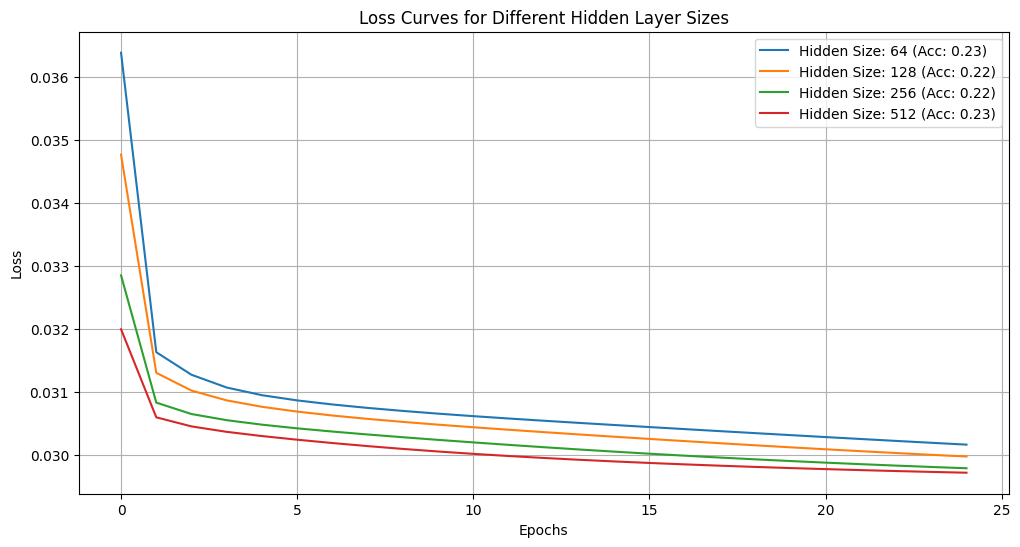

In [ ]:
hidden_sizes = [64,128,256,512]
hidden_results = {}

for hidden_size in hidden_sizes:
    print(f"\nTraining with hidden layer size: {hidden_size}")
    mlp = MultiLayerPerceptron(input_size=X.shape[1], hidden_size=hidden_size, output_size=y.shape[1], initialization="random")

    epochs = 25
    lr = 0.01
    mlp.train(X, y, epochs, lr)

    accuracy = mlp.compute_accuracy(X, y)
    print(f"Accuracy with hidden layer size {hidden_size}: {accuracy}")

    hidden_results[hidden_size] = {
        "losses": mlp.losses,
        "accuracy": accuracy
    }

# Plotting loss curves for different hidden layer sizes
plt.figure(figsize=(12, 6))
for size in hidden_results:
    plt.plot(hidden_results[size]["losses"], label=f"Hidden Size: {size} (Acc: {hidden_results[size]['accuracy']:.2f})")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Hidden Layer Sizes")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import os
import pickle
import numpy as np


# Sample MLP class definition (simplified)
class MultiLayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_input_hidden = np.random.randn(1, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden_output = np.random.randn(1, output_size)

    def save_weights(self, filename):
        weights = {
            "weights_input_hidden": self.weights_input_hidden,
            "weights_hidden_output": self.weights_hidden_output,
            "bias_input_hidden": self.bias_input_hidden,
            "bias_hidden_output": self.bias_hidden_output
        }
        with open(filename, 'wb') as f:
            pickle.dump(weights, f)

    def load_weights(self, filename):
        with open(filename, 'rb') as f:
            weights = pickle.load(f)
            self.weights_input_hidden = weights["weights_input_hidden"]
            self.weights_hidden_output = weights["weights_hidden_output"]
            self.bias_input_hidden = weights["bias_input_hidden"]
            self.bias_hidden_output = weights["bias_hidden_output"]

# Example usage
if __name__ == "__main__":
    # Define input, hidden, and output sizes
    input_size = 8  # Example input size
    hidden_size = 5  # Example hidden layer size
    output_size = 3  # Example output size (number of classes)

    # Initialize and train the model (dummy initialization for this example)
    mlp = MultiLayerPerceptron(input_size, hidden_size, output_size)

    # Save the trained weights to a file
    filename = "mlp_weights.pkl"
    mlp.save_weights(filename)
    print(f"Weights saved to {filename}")

    # Verify that the file exists
    if os.path.exists(filename):
        print("File exists.")
    else:
        print("File does not exist.")

    # Get and print current working directory
    print("Current Working Directory:", os.getcwd())

    # Load the weights into a new MLP instance
    new_mlp = MultiLayerPerceptron(input_size, hidden_size, output_size)
    new_mlp.load_weights(filename)
    print("Weights loaded into new MLP instance.")

    # (Optional) Verify that weights are loaded correctly
    print("Loaded weights:", new_mlp.weights_input_hidden)


Weights saved to mlp_weights.pkl
File exists.
Current Working Directory: /content
Weights loaded into new MLP instance.
Loaded weights: [[-6.59595523e-01 -1.08478436e+00 -7.91821909e-01 -3.96123710e-01
  -2.45414663e+00]
 [ 1.96856773e+00 -2.22745437e+00 -3.65330955e-01  1.68939151e-01
   1.39731348e+00]
 [ 3.66139794e-01  1.00188819e+00  1.88984458e+00 -2.70638583e-02
   1.41272473e+00]
 [ 1.53550458e+00 -2.08903261e-03  6.06295864e-01  1.62524147e+00
   6.25728917e-01]
 [-2.95793016e-01  1.25532331e-01  6.09677779e-01  2.98750964e-01
   6.76340300e-01]
 [ 3.98331452e-01  7.00386196e-01 -3.51250058e-01  5.64978920e-02
  -8.35512134e-01]
 [-1.64333383e+00 -3.39373586e-01 -1.48257463e+00 -9.39188316e-01
   4.71230216e-01]
 [-5.49878180e-01  4.51262061e-01  2.83555067e-01  7.44016583e-01
  -7.64490098e-01]]


# Digit Recognition

Load the train and test splits of MNIST dataset using torchvision

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the transformations for the training dataset
train_transforms = transforms.Compose([
    transforms.RandomRotation(5),
    transforms.RandomCrop(size=28, padding=2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Define the transformations for the testing dataset
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the training dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=train_transforms)

# Load the testing dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=test_transforms)

# Create DataLoaders for training and testing datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Print some information about the dataset
print("Training dataset size:", len(train_dataset))
print("Testing dataset size:", len(test_dataset))


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 33.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.74MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 12.1MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.61MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training dataset size: 60000
Testing dataset size: 10000


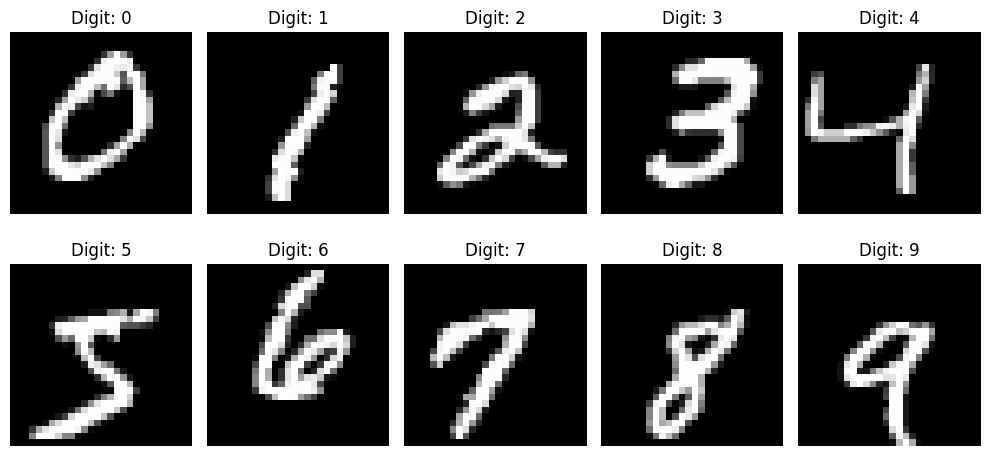

Training dataset size: 60000
Testing dataset size: 10000


In [ ]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the transformations for the training dataset
train_transforms = transforms.Compose([
    transforms.RandomRotation(5),
    transforms.RandomCrop(size=28, padding=2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Define the transformations for the testing dataset
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the training dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=train_transforms)

# Load the testing dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=test_transforms)

# Create DataLoaders for training and testing datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Function to plot one image of each digit
def plot_digits(dataset):
    plt.figure(figsize=(10, 5))

    for i in range(10):
        # Get all images of the current digit
        digit_images = [dataset[j][0] for j in range(len(dataset)) if dataset[j][1] == i]

        # Plot the first image of the current digit
        plt.subplot(2, 5, i + 1)
        plt.imshow(digit_images[0].numpy().squeeze(), cmap='gray')
        plt.title(f'Digit: {i}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Plot one image of each digit from the training dataset
plot_digits(train_dataset)

# Print sizes of the datasets
print("Training dataset size:", len(train_dataset))
print("Testing dataset size:", len(test_dataset))


Make two models:

a. 3-Layer MLP using PyTorch all using Linear layers

b. Convolutional Network 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

# Define the transformations for the training dataset
train_transforms = transforms.Compose([
    transforms.RandomRotation(5),
    transforms.RandomCrop(size=28, padding=2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Define the transformations for the testing dataset
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the training dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=train_transforms)

# Load the testing dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=test_transforms)

# Create DataLoaders for training and testing datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# a. Define a 3-Layer MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer
        self.fc2 = nn.Linear(128, 64)        # Hidden layer
        self.fc3 = nn.Linear(64, 10)         # Output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))  # First hidden layer with ReLU activation
        x = torch.relu(self.fc2(x))  # Second hidden layer with ReLU activation
        x = self.fc3(x)  # Output layer (logits)
        return x

# b. Define a Convolutional Neural Network (CNN)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # Convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # Second convolutional layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer
        self.fc1 = nn.Linear(64 * 14 * 14, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 10)             # Output layer

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # Convolution + ReLU + Pooling
        x = self.pool(torch.relu(self.conv2(x)))  # Second Conv + ReLU + Pooling
        x = x.view(-1, 64 * 14 * 14)  # Flatten the output
        x = torch.relu(self.fc1(x))  # Fully connected layer
        x = self.fc2(x)  # Output layer (logits)
        return x

# Initialize the models
mlp_model = MLP()
cnn_model = CNN()

# Print the model summaries
print("3-Layer MLP Model:")
print(mlp_model)

print("\nConvolutional Neural Network Model:")
print(cnn_model)


3-Layer MLP Model:
MLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Convolutional Neural Network Model:
CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12544, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


Train both the models separately for 5-10 epochs using Adam as the optimizer
and CrossEntropyLoss as the Loss Function. 

a. Make train-test accuracy and loss plots

b. Visualize correct and incorrect examples from each class

Epoch [1/5], Train Loss: 0.7579, Train Accuracy: 0.7608, Test Loss: 0.2988, Test Accuracy: 0.9060
Epoch [2/5], Train Loss: 0.3253, Train Accuracy: 0.9023, Test Loss: 0.1679, Test Accuracy: 0.9530
Epoch [3/5], Train Loss: 0.2456, Train Accuracy: 0.9247, Test Loss: 0.1469, Test Accuracy: 0.9562
Epoch [4/5], Train Loss: 0.2130, Train Accuracy: 0.9352, Test Loss: 0.1270, Test Accuracy: 0.9596
Epoch [5/5], Train Loss: 0.1903, Train Accuracy: 0.9429, Test Loss: 0.1338, Test Accuracy: 0.9581


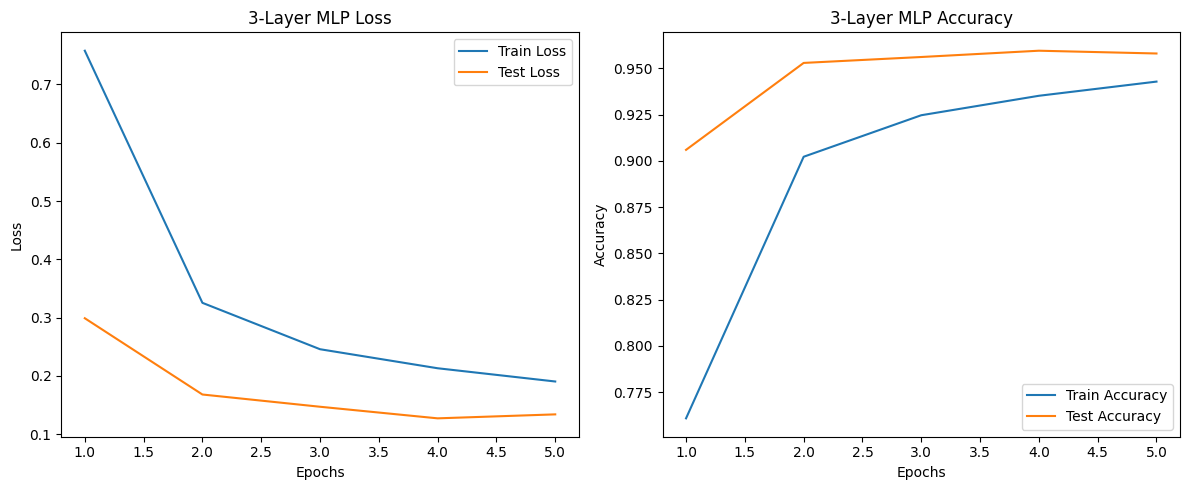

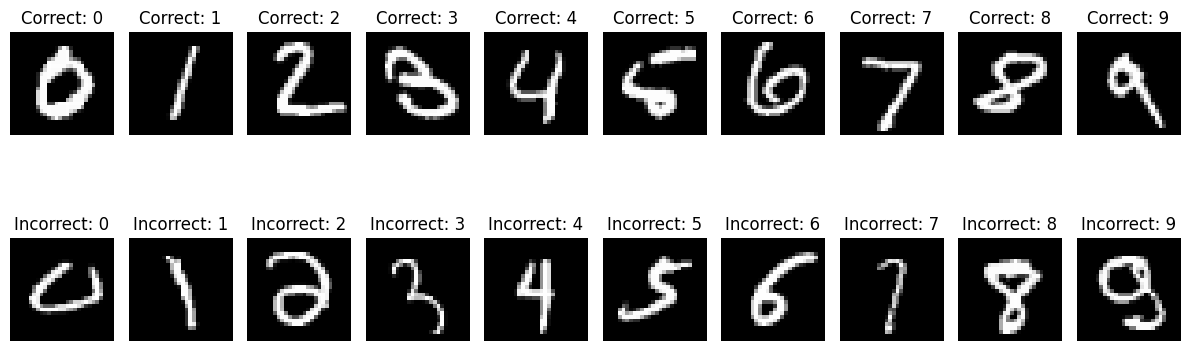

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the transformations for the training dataset
train_transforms = transforms.Compose([
    transforms.RandomRotation(5),
    transforms.RandomCrop(size=28, padding=2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Define the transformations for the testing dataset
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the training dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=train_transforms)

# Load the testing dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=test_transforms)

# Create DataLoaders for training and testing datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define a 3-Layer MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer
        self.fc2 = nn.Linear(128, 64)        # Hidden layer
        self.fc3 = nn.Linear(64, 10)         # Output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))  # First hidden layer with ReLU activation
        x = torch.relu(self.fc2(x))  # Second hidden layer with ReLU activation
        x = self.fc3(x)  # Output layer (logits)
        return x

# Function to train the model
def train_model(model, train_loader, test_loader, epochs=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0

        # Training loop
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(correct / len(train_loader.dataset))

        # Validation loop
        model.eval()
        running_loss = 0.0
        correct = 0

        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum().item()

        test_losses.append(running_loss / len(test_loader))
        test_accuracies.append(correct / len(test_loader.dataset))

        print(f'Epoch [{epoch+1}/{epochs}], '
              f'Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, '
              f'Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}')

    return train_losses, test_losses, train_accuracies, test_accuracies

# Function to plot the accuracy and loss
def plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies, model_name):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, test_losses, label='Test Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, test_accuracies, label='Test Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to visualize correct and incorrect predictions
def visualize_predictions(model, test_loader):
    model.eval()
    correct_examples = {i: [] for i in range(10)}
    incorrect_examples = {i: [] for i in range(10)}

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            for idx in range(len(labels)):
                if predicted[idx] == labels[idx]:
                    correct_examples[labels[idx].item()].append(images[idx])
                else:
                    incorrect_examples[labels[idx].item()].append(images[idx])

    # Plotting
    plt.figure(figsize=(12, 5))

    for i in range(10):
        if correct_examples[i]:  # Plot only if there are correct examples
            plt.subplot(2, 10, i + 1)
            plt.imshow(correct_examples[i][0].squeeze(), cmap='gray')
            plt.title(f'Correct: {i}')
            plt.axis('off')

        if incorrect_examples[i]:  # Plot only if there are incorrect examples
            plt.subplot(2, 10, i + 11)
            plt.imshow(incorrect_examples[i][0].squeeze(), cmap='gray')
            plt.title(f'Incorrect: {i}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Training the MLP model
mlp_model = MLP()
train_losses_mlp, test_losses_mlp, train_acc_mlp, test_acc_mlp = train_model(mlp_model, train_loader, test_loader, epochs=5)
plot_metrics(train_losses_mlp, test_losses_mlp, train_acc_mlp, test_acc_mlp, "3-Layer MLP")

# Visualizing predictions for the MLP
visualize_predictions(mlp_model, test_loader)
